#### Описание датасета
Был выбран датасет с данными о 50 самых продаваемых книгах на Амазоне в период с 2009 по 2019 год. Этот датасет включает в себя данные, описанные в разделе ниже.\
Ссылка на датасет: `https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019`\
Реальные данные для датасета автор взял с сайта Amazon.

##### Описание столбцов:

<pre>
+----------------------------------------------------------+
| Название    | Тип данных | Описание                      |
|-------------+------------+-------------------------------|
| Name        | object     | Название книги                |
| Author      | object     | Автор книги                   |
| User Rating | float64    | Пользовательская оценка книги |
| Reviews     | int64      | Количество отзывов о книге    |
| Price       | int64      | Цена книги                    |
| Year        | int64      | Год продажи книги             |
| Genre       | object     | Жанр книги                    |
+----------------------------------------------------------+
</pre>

Будем рассматривать только столбцы с числовыми типами данных `float64` и `int64`.

#### Цели лабораторной работы

Добавить дополнительный столбец на основе уже существующих.\
Построить графики зависимостей.\
Познакомиться с методом k-средних из библиотеки `skilearn`.

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn
import sklearn

In [317]:
data = pd.read_csv("./bestsellers_with_categories.csv")
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


#### ADDING NEW COLUMN

In [318]:
numeric_data = data.select_dtypes(include=["int64", "float64"])
main_numeric_columns = numeric_data.columns

def set_popularity_column(df):
    reviews_index_mapping = {
        j: i + 1
        for i, j in enumerate(
            df.sort_values(
                ["Reviews", "User Rating"],
                ascending=[False, False]
            ).index
        )
    }
    df["Popularity"] = [
        reviews_index_mapping[i]
        for i in range(len(df))
    ]

set_popularity_column(numeric_data)
numeric_data.head()

,User Rating,Reviews,Price,Year,Popularity
0,4.7,17350,8,2016,133
1,4.6,2052,22,2011,490
2,4.7,18979,15,2018,125
3,4.7,21424,6,2017,105
4,4.8,7665,12,2019,294


#### PROCCESSING DATA

##### DUPLICATES

In [319]:
number_duplicates = numeric_data[main_numeric_columns].duplicated().sum()

f"FOUND {number_duplicates} DUPLICATE ROWS"

'FOUND 0 DUPLICATE ROWS'

##### EMPTY

In [320]:
number_empty = numeric_data.isnull().sum().sum()

f"FOUND {number_empty} EMPTY ROWS"

'FOUND 0 EMPTY ROWS'

##### OUTLIER

In [321]:
prev_numeric_data_length = len(numeric_data)

for column in numeric_data.columns:
    numeric_data = numeric_data[np.abs(scipy.stats.zscore(numeric_data[column])) < 2]

numeric_data = numeric_data.reset_index().drop(columns=["index"])
set_popularity_column(numeric_data)

f"FOUND {prev_numeric_data_length - len(numeric_data)} OUTLIER ROWS"

'FOUND 66 OUTLIER ROWS'

#### SCATTER 1

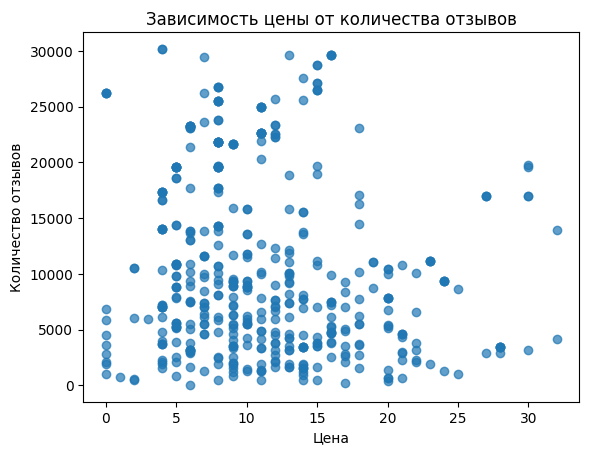

In [322]:
plt.scatter(numeric_data["Price"], numeric_data["Reviews"], alpha=0.7)
plt.ylabel("Количество отзывов")
plt.xlabel("Цена")
plt.title("Зависимость цены от количества отзывов")
plt.show()

#### SCATTER 2

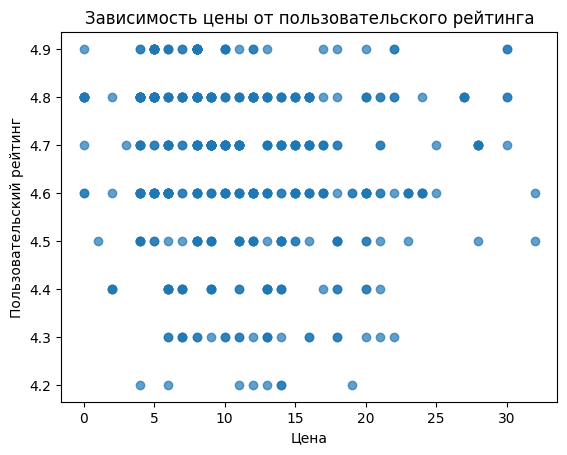

In [323]:
plt.scatter(numeric_data["Price"], numeric_data["User Rating"], alpha=0.7)
plt.ylabel("Пользовательский рейтинг")
plt.xlabel("Цена")
plt.title("Зависимость цены от пользовательского рейтинга")
plt.show()

#### KMEANS

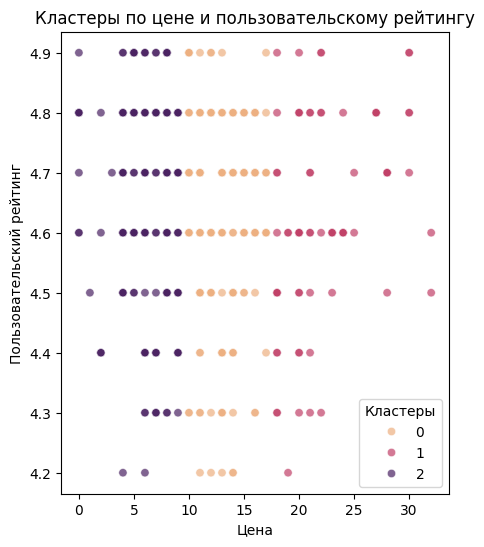

In [324]:
kmeans_data = numeric_data[["Price", "User Rating"]].copy()
kmeans = sklearn.cluster.KMeans(n_clusters=3)
kmeans_data["Cluster"] = kmeans.fit_predict(kmeans_data)

plt.figure(figsize=(5, 6))
seaborn.scatterplot(
    data=kmeans_data,
    x="Price",
    y="User Rating",
    hue="Cluster",
    palette="flare",
    alpha=0.7
)
plt.ylabel("Пользовательский рейтинг")
plt.xlabel("Цена")
plt.title("Кластеры по цене и пользовательскому рейтингу")
plt.legend(title="Кластеры")
plt.show()

#### Выводы
В ходе лабораторной работы был исследован датасет, содержащий информацию о наиболее популярных книгах в период с 2009 по 2019 год.\
Удалось построить диаграммы, отображающие зависимости параметров друг от друга.\
Также было интересно поработать с методом k-средних из библиотеки `skilearn`.